# Random Forest

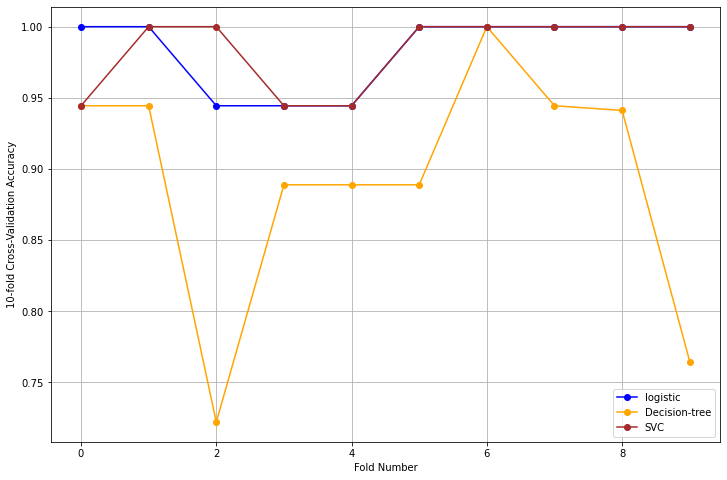

In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Chapter6/wine.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
wine = pd.read_csv(file_content_stream)

## Defining input and target 
X = wine.drop('Wine', axis = 1)
Y = wine['Wine']

## Standardizing input variables
scaler = MinMaxScaler(feature_range = (-1, 1))
X = scaler.fit_transform(X)

## Defining logistic model 
logit = LogisticRegression(max_iter = 5000, solver = 'lbfgs', multi_class = 'auto', random_state = 1000)
logit_scores = cross_val_score(logit, X, Y, cv = 10, n_jobs = -1)

## Defining decision tree model
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 1000)
tree_scores = cross_val_score(tree, X, Y, cv = 10, n_jobs = -1)

## Defining svc model
svc = SVC(kernel = 'rbf', gamma = 'scale', random_state = 1000)
svc_scores = cross_val_score(svc, X, Y, cv = 10, n_jobs = -1)

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(logit_scores, color = 'blue', marker = 'o')
plt.plot(tree_scores, color = 'orange', marker = 'o')
plt.plot(svc_scores, color = 'brown', marker = 'o')
plt.xlabel('Fold Number')
plt.ylabel('10-fold Cross-Validation Accuracy')
plt.legend(['logistic', 'Decision-tree', 'SVC'], loc = 'lower right')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot1.pdf')

In [2]:
## average cross-validation accuracy
logit_scores.mean()

0.9833333333333334

In [3]:
## average cross-validation accuracy
tree_scores.mean()

0.8928104575163399

In [4]:
## average cross-validation accuracy
svc_scores.mean()

0.9833333333333334

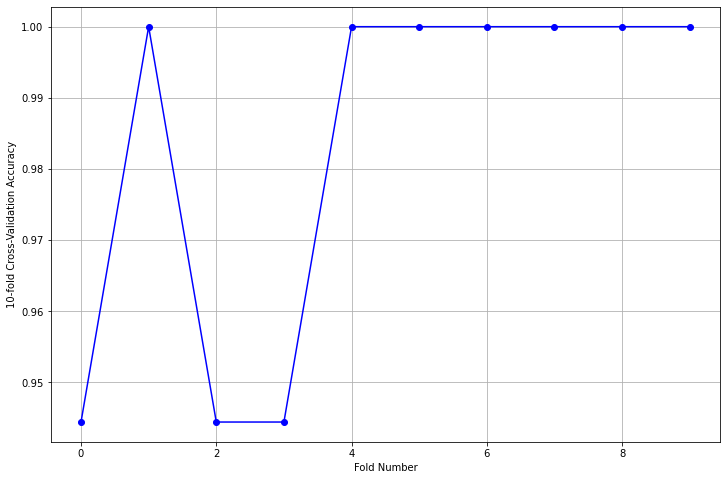

In [5]:
from sklearn.ensemble import RandomForestClassifier

## Defining random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 1000)
RF_scores = cross_val_score(RF, X, Y, cv = 10, n_jobs = -1)

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(RF_scores, color = 'blue', marker = 'o')
plt.xlabel('Fold Number')
plt.ylabel('10-fold Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot2.pdf')

In [6]:
## average cross-validation accuracy
RF_scores.mean()

0.9833333333333332

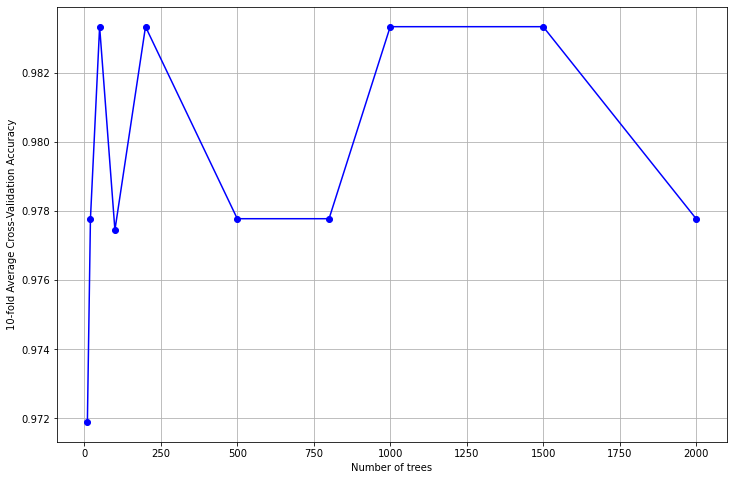

In [7]:
## Defining different number of to be considered trees
n_trees = [10, 20, 50, 100, 200, 500, 800, 1000, 1500, 2000]

results = []

for i in range(0, len(n_trees)):
    
    ## Defining random forest model
    RF = RandomForestClassifier(n_estimators = n_trees[i], n_jobs = -1, criterion = 'entropy', random_state = 1000)
    RF_scores = cross_val_score(RF, X, Y, cv = 10, n_jobs = -1)
    
    ## Appending average accuracy
    results.append(np.mean(RF_scores))

## Plotting cross-validation results
fig = plt.figure(figsize = (12, 8))
plt.plot(n_trees, results, color = 'blue', marker = 'o')
plt.xlabel('Number of trees')
plt.ylabel('10-fold Average Cross-Validation Accuracy')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot3.pdf')

# Feature Importance

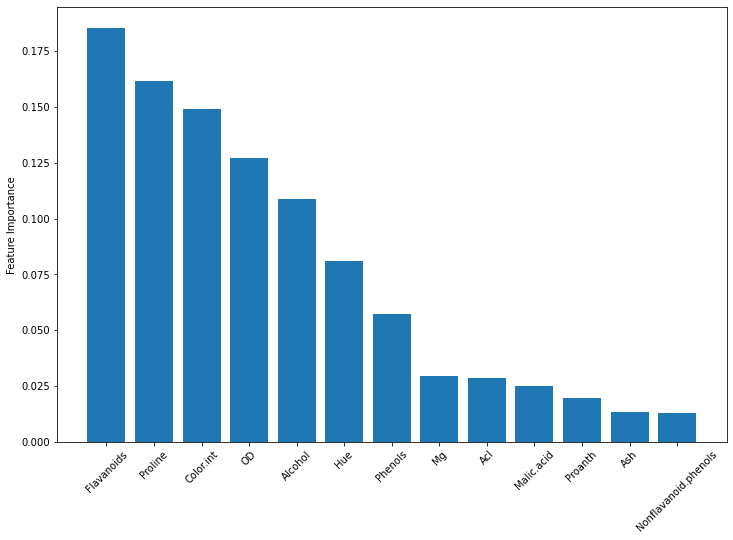

In [8]:
from sklearn.ensemble import RandomForestClassifier

## Fitting a 200-tree random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 100).fit(X, Y)

## Exctracting feature importance 
importances = RF.feature_importances_

## Extracting feature names 
feature_names = wine.drop('Wine', axis = 1).columns

## sorting the importances (from largest to smallest)
to_arrange = np.argsort(importances)[::-1]
importances = importances[to_arrange]
feature_names = feature_names[to_arrange]

## Visualizing the importances
fig = plt.figure(figsize = (12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation = 45)
plt.ylabel('Feature Importance')
plt.show()

# fig.savefig('chapter6_plot4.pdf')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Fitting a 200-tree random forest model
RF = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', random_state = 100).fit(X, Y)

## Selecting important features
sfm = SelectFromModel(estimator = RF, prefit = True, threshold = 0.02)
X_sfm = sfm.transform(X)
X_sfm.shape

(178, 10)

# AdaBoost

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


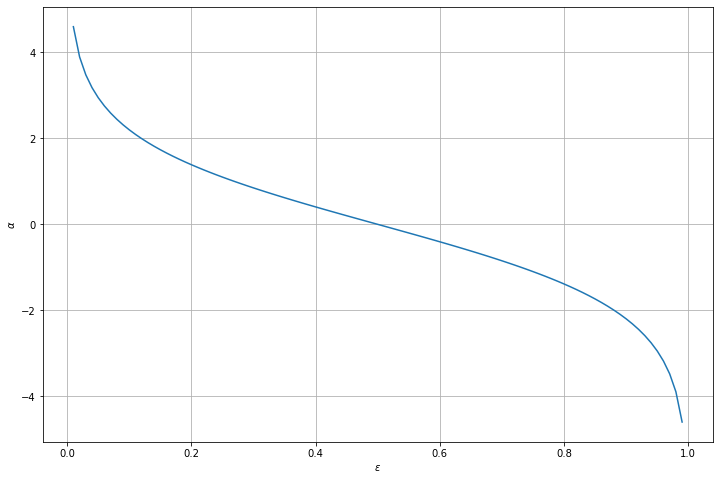

In [21]:
## Visualizing alpha as a function of epsilon
epsilon = np.linspace(0.01, 1, num = 100)
alpha = np.log((1 - epsilon) / epsilon)

fig = plt.figure(figsize = (12, 8))
plt.plot(epsilon, alpha)
plt.xlabel('$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot5.pdf')

# AdaBoost SAMME

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


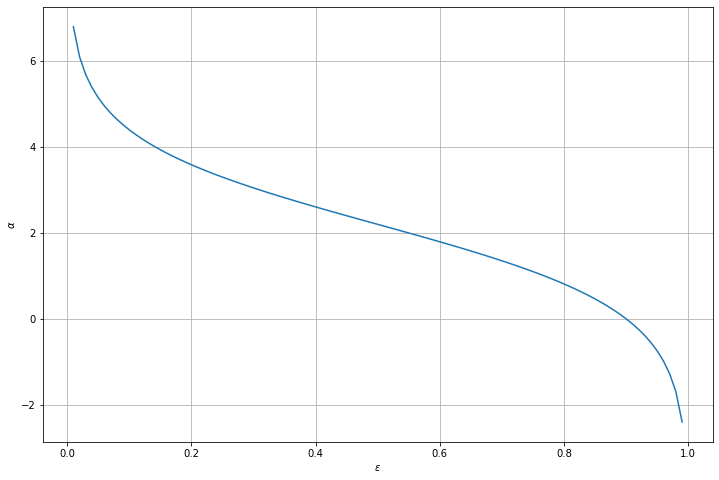

In [3]:
## Visualizing alpha as a function of epsilon
p = 10
epsilon = np.linspace(0.01, 1, num = 100)
alpha = np.log((1 - epsilon) * (p - 1) / epsilon)

fig = plt.figure(figsize = (12, 8))
plt.plot(epsilon, alpha)
plt.xlabel('$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.grid()
plt.show()

# fig.savefig('chapter6_plot6.pdf')